In [1]:
import pickle
from source import *

In [2]:
with open("group_a_gs1_history.pkl", "rb") as fp:
    data: dict[str, list[int]] = pickle.load(fp)

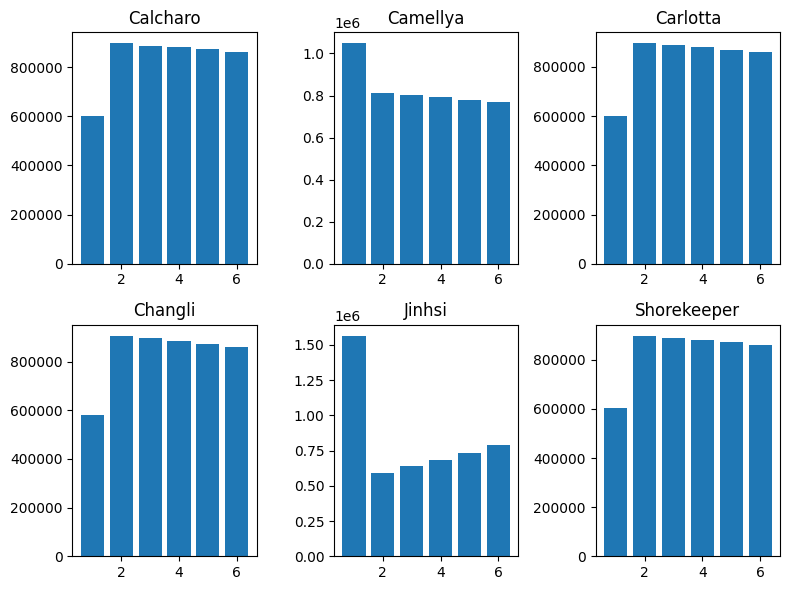

In [3]:
import collections
import matplotlib.pyplot as plt

# Create subplots
columns = 3
rows = (len(data) + columns - 1) // columns
fig, axes = plt.subplots(rows, columns, figsize=(8, 6))

# Plot each array separately
axes = axes.flatten()

for i, (name, values) in enumerate(data.items()):
    counter = collections.Counter(values)
    axes[i].bar(counter.keys(), counter.values())
    axes[i].set_title(name)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()